## Import Libraries

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Import all data sets 

Get First Data Set

In [23]:
!wget -q -O 'airbnb_data' http://data.insideairbnb.com/united-kingdom/england/london/2019-05-05/visualisations/reviews.csv
airbnb_data.head()

,id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count
0,11551,43039,Adriano,Lambeth,51.46225,-0.11732,Entire home/apt,88,2,183,2018-08-22,1.65,2
1,13913,54730,Alina,Islington,51.56802,-0.11121,Private room,65,1,14,2018-06-17,0.13,3
2,15400,60302,Philippa,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,3,84,2019-04-22,0.74,1
3,17402,67564,Liz,Westminster,51.52098,-0.14002,Entire home/apt,300,3,40,2019-04-20,0.40,13
4,24328,41759,Joe,Wandsworth,51.47298,-0.16376,Entire home/apt,175,30,92,2016-09-07,0.89,1


In [199]:
#Number of listing per room type 
print(airbnb_data[['id','room_type']].groupby('room_type').count())

#Average price and reviews 
print(airbnb_data[['price']].describe())
print(airbnb_data[['number_of_reviews']].describe())
print(airbnb_data[['calculated_host_listings_count']].describe())

                    id
room_type             
Entire home/apt  45065
Private room     34964
Shared room        738
              price
count  80767.000000
mean     118.321022
std      211.199175
min        0.000000
25%       45.000000
50%       80.000000
75%      135.000000
max    13700.000000
       number_of_reviews
count       80767.000000
mean           16.104436
std            34.173312
min             0.000000
25%             0.000000
50%             4.000000
75%            16.000000
max           639.000000
       calculated_host_listings_count
count                    80767.000000
mean                        24.376305
std                        129.968962
min                          1.000000
25%                          1.000000
50%                          1.000000
75%                          4.000000
max                       1104.000000


In [202]:
#Price per room type
airbnb_data[['price','room_type','number_of_reviews','reviews_per_month']].groupby('room_type').mean()

,price,number_of_reviews,reviews_per_month
room_type,,,
Entire home/apt,163.845024,12.951670,1.001471
Private room,60.709873,20.220312,1.333947
Shared room,67.883469,13.627371,1.234736


Create sub dataset that is summarised 

In [116]:
airbnb_data1 = airbnb_data[['neighbourhood','room_type','host_id']].groupby(['neighbourhood','room_type']).count()
airbnb_data1 = airbnb_data1.reset_index()
#Pivot
airbnb_data1 = airbnb_data1.pivot(index='neighbourhood',
                   columns='room_type',
                   values='host_id')
airbnb_data1 = airbnb_data1.reset_index()
airbnb_data1.head()

room_type,neighbourhood,Entire home/apt,Private room,Shared room
0,Barking and Dagenham,94,214,7
1,Barnet,615,900,19
2,Bexley,64,176,2
3,Brent,1115,1212,48
4,Bromley,278,368,5


In [131]:
airbnbsum = airbnb_data.groupby('neighbourhood').agg({
         'neighbourhood' : {'listednumber':"count"},    # number of property
         'price' : {'avgprice' : 'mean'},  # get the count of networks
         'number_of_reviews' : {'avgreview' : 'mean'} #the first date per group
    })
airbnbsum.columns = ["_".join(x) for x in airbnbsum.columns.ravel()]
airbnbsum = airbnbsum.reset_index()
airbnbsum.head()

C:\Users\yipa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,neighbourhood,neighbourhood_listednumber,price_avgprice,number_of_reviews_avgreview
0,Barking and Dagenham,315,65.136508,6.603175
1,Barnet,1534,79.352673,10.549544
2,Bexley,242,67.359504,6.904959
3,Brent,2375,86.546526,15.458526
4,Bromley,651,65.863287,9.600614


In [132]:
airbnbsum = pd.merge(airbnbsum,
              airbnb_data1,
              on = 'neighbourhood')
airbnbsum.head()

,neighbourhood,neighbourhood_listednumber,price_avgprice,number_of_reviews_avgreview,Entire home/apt,Private room,Shared room
0,Barking and Dagenham,315,65.136508,6.603175,94,214,7
1,Barnet,1534,79.352673,10.549544,615,900,19
2,Bexley,242,67.359504,6.904959,64,176,2
3,Brent,2375,86.546526,15.458526,1115,1212,48
4,Bromley,651,65.863287,9.600614,278,368,5


Get second data set

In [ ]:
!wget -q -O 'london_data.json' http://data.insideairbnb.com/united-kingdom/england/london/2019-05-05/visualisations/neighbourhoods.geojson

In [ ]:
with open('london_data.json') as json_data:
    london_geo = json.load(json_data)


In [ ]:
# define the dataframe columns
column_names = ['neighbourhood', 'latitude', 'v'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [ ]:
for data in london_geo:
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [26]:
neighbourhood = airbnb_data[['neighbourhood','latitude','longitude']]
neighbourhood.head()

,neighbourhood,latitude,longitude
0,Lambeth,51.46225,-0.11732
1,Islington,51.56802,-0.11121
2,Kensington and Chelsea,51.48796,-0.16898
3,Westminster,51.52098,-0.14002
4,Wandsworth,51.47298,-0.16376


Get Third Data set 

In [35]:
profile = pd.read_csv('londonborough.csv')
profile.head()

,Area name,London IO,Population Estimate,Household Estimate,Inland Area,Population density,Average Age,Proportion of population young age,Proportion of population of working-age,Proportion of population aged 65 and over,resident population born abroad,Employment rate,Unemployment rate,Modelled Household median income estimates,Jobs Density,Crime rates per thousand population,Median House Price,Rented from Private landlord,Greenspace Proportion
0,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,0.0,64.6,0.0,63620,84.3,0.0,799999,0.0,4.8
1,Barking and Dagenham,Outer London,209000,78188,3611,57.9,32.9,27.2,63.1,9.7,37.8,65.8,11.0,29420,0.5,83.4,243500,20.3,33.6
2,Barnet,Outer London,389600,151423,8675,44.9,37.3,21.1,64.9,14.0,35.2,68.5,8.5,40530,0.7,62.7,445000,31.1,41.3
3,Bexley,Outer London,244300,97736,6058,40.3,39.0,20.6,62.9,16.6,16.1,75.1,7.6,36990,0.6,51.8,275000,11.4,31.7
4,Brent,Outer London,332100,121048,4323,76.8,35.6,20.9,67.8,11.3,53.9,69.5,7.5,32140,0.6,78.8,407250,34.8,21.9


Get Fourth Data Set from FourSquare

In [37]:
# define Foursquare Credentials and Version
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your Foursquare ID
CLIENT_SECRET:your Foursquare Secret


In [ ]:
radius = 1000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(neighbourhood['latitude'], neighbourhood['longitude'], neighbourhood['neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [166]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

# Look at summary figures 
sumvenure = venues_df.groupby(by='Borough','VenueCategory')

#Pivot
sumvenure = sumvenure.pivot(index='Borough',
                       columns='Category',
                       values='No')
sumvenure = sumvenure.reset_index()
sumvenure.head()

Category,Borough,club,restaurant
0,Barking and Dagenham,10,35
1,Barnet,10,270
2,Bexley,20,110
3,Brent,15,190
4,Bromley,20,200



Merge to one big data set


In [167]:
dt = pd.merge(profile,
              sumvenure,
              left_on = 'Area name',
              right_on = 'Borough')
dt.head()

,Area name,London IO,Population Estimate,Household Estimate,Inland Area,Population density,Average Age,Proportion of population young age,Proportion of population of working-age,Proportion of population aged 65 and over,...,Unemployment rate,Modelled Household median income estimates,Jobs Density,Crime rates per thousand population,Median House Price,Rented from Private landlord,Greenspace Proportion,Borough,club,restaurant
0,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,...,0.0,63620,84.3,0.0,799999,0.0,4.8,City of London,15,295
1,Barking and Dagenham,Outer London,209000,78188,3611,57.9,32.9,27.2,63.1,9.7,...,11.0,29420,0.5,83.4,243500,20.3,33.6,Barking and Dagenham,10,35
2,Barnet,Outer London,389600,151423,8675,44.9,37.3,21.1,64.9,14.0,...,8.5,40530,0.7,62.7,445000,31.1,41.3,Barnet,10,270
3,Bexley,Outer London,244300,97736,6058,40.3,39.0,20.6,62.9,16.6,...,7.6,36990,0.6,51.8,275000,11.4,31.7,Bexley,20,110
4,Brent,Outer London,332100,121048,4323,76.8,35.6,20.9,67.8,11.3,...,7.5,32140,0.6,78.8,407250,34.8,21.9,Brent,15,190


In [168]:
dt = pd.merge(dt,
              airbnbsum,
              left_on = 'Area name',
              right_on = 'neighbourhood')
dt.head()

,Area name,London IO,Population Estimate,Household Estimate,Inland Area,Population density,Average Age,Proportion of population young age,Proportion of population of working-age,Proportion of population aged 65 and over,...,Borough,club,restaurant,neighbourhood,neighbourhood_listednumber,price_avgprice,number_of_reviews_avgreview,Entire home/apt,Private room,Shared room
0,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,...,City of London,15,295,City of London,436,177.220183,16.422018,377,57,2
1,Barking and Dagenham,Outer London,209000,78188,3611,57.9,32.9,27.2,63.1,9.7,...,Barking and Dagenham,10,35,Barking and Dagenham,315,65.136508,6.603175,94,214,7
2,Barnet,Outer London,389600,151423,8675,44.9,37.3,21.1,64.9,14.0,...,Barnet,10,270,Barnet,1534,79.352673,10.549544,615,900,19
3,Bexley,Outer London,244300,97736,6058,40.3,39.0,20.6,62.9,16.6,...,Bexley,20,110,Bexley,242,67.359504,6.904959,64,176,2
4,Brent,Outer London,332100,121048,4323,76.8,35.6,20.9,67.8,11.3,...,Brent,15,190,Brent,2375,86.546526,15.458526,1115,1212,48


### Cluctering

In [169]:
# import k-means from clustering stage
from sklearn.cluster import KMeans


In [171]:
dt_clustering.dtypes

London IO                                      object
Population Estimate                             int64
Household Estimate                              int64
Inland Area                                     int64
Population density                            float64
Average Age                                   float64
Proportion of population young age            float64
Proportion of population of working-age       float64
Proportion of population aged 65 and over     float64
resident population born abroad               float64
Employment rate                               float64
Unemployment rate                             float64
Modelled Household median income estimates      int64
Jobs Density                                  float64
Crime rates per thousand population           float64
Median House Price                              int64
Rented from Private landlord                  float64
Greenspace Proportion                         float64
club                        

In [174]:
# set number of clusters
kclusters = 3

dt_clustering = dt.drop(["Area name","Borough","neighbourhood","London IO"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dt_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [179]:
# create a new dataframe that includes the cluster 
dt_merged = dt.copy()

# add clustering labels
dt_merged["Cluster Labels"] = kmeans.labels_

In [180]:
dt_merged = dt_merged.drop(["Area name","Borough"], 1)
dt_merged.head()

,London IO,Population Estimate,Household Estimate,Inland Area,Population density,Average Age,Proportion of population young age,Proportion of population of working-age,Proportion of population aged 65 and over,resident population born abroad,...,club,restaurant,neighbourhood,neighbourhood_listednumber,price_avgprice,number_of_reviews_avgreview,Entire home/apt,Private room,Shared room,Cluster Labels
0,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,0.0,...,15,295,City of London,436,177.220183,16.422018,377,57,2,2
1,Outer London,209000,78188,3611,57.9,32.9,27.2,63.1,9.7,37.8,...,10,35,Barking and Dagenham,315,65.136508,6.603175,94,214,7,1
2,Outer London,389600,151423,8675,44.9,37.3,21.1,64.9,14.0,35.2,...,10,270,Barnet,1534,79.352673,10.549544,615,900,19,1
3,Outer London,244300,97736,6058,40.3,39.0,20.6,62.9,16.6,16.1,...,20,110,Bexley,242,67.359504,6.904959,64,176,2,1
4,Outer London,332100,121048,4323,76.8,35.6,20.9,67.8,11.3,53.9,...,15,190,Brent,2375,86.546526,15.458526,1115,1212,48,1


Examine Cluster

In [187]:
#Cluster 0 
dt_merged.loc[dt_merged['Cluster Labels'] == 0]

,London IO,Population Estimate,Household Estimate,Inland Area,Population density,Average Age,Proportion of population young age,Proportion of population of working-age,Proportion of population aged 65 and over,resident population born abroad,...,club,restaurant,neighbourhood,neighbourhood_listednumber,price_avgprice,number_of_reviews_avgreview,Entire home/apt,Private room,Shared room,Cluster Labels
6,Inner London,242500,107654,2179,111.3,36.4,17.3,71.0,11.7,41.4,...,20,600,Camden,5685,139.538083,19.905541,3755,1855,75,0
12,Inner London,185300,83552,1640,113.0,35.7,17.4,72.3,10.3,43.2,...,15,270,Hammersmith and Fulham,4043,122.038091,17.720752,2504,1512,27,0
18,Inner London,231200,105038,1486,155.6,34.8,15.9,75.3,8.8,36.6,...,10,370,Islington,4948,112.239289,16.940380,3064,1848,36,0
26,Outer London,197300,85108,5741,34.4,38.8,20.7,64.5,14.8,23.7,...,15,195,Richmond upon Thames,1147,121.324324,16.766347,625,520,2,0
31,Inner London,321000,138149,3426,93.7,35.0,17.8,72.8,9.3,32.8,...,20,275,Wandsworth,4082,116.895394,12.626409,2243,1827,12,0


In [189]:
#Cluster 1
dt_merged.loc[dt_merged['Cluster Labels'] == 1]

,London IO,Population Estimate,Household Estimate,Inland Area,Population density,Average Age,Proportion of population young age,Proportion of population of working-age,Proportion of population aged 65 and over,resident population born abroad,...,club,restaurant,neighbourhood,neighbourhood_listednumber,price_avgprice,number_of_reviews_avgreview,Entire home/apt,Private room,Shared room,Cluster Labels
1,Outer London,209000,78188,3611,57.9,32.9,27.2,63.1,9.7,37.8,...,10,35,Barking and Dagenham,315,65.136508,6.603175,94,214,7,1
2,Outer London,389600,151423,8675,44.9,37.3,21.1,64.9,14.0,35.2,...,10,270,Barnet,1534,79.352673,10.549544,615,900,19,1
3,Outer London,244300,97736,6058,40.3,39.0,20.6,62.9,16.6,16.1,...,20,110,Bexley,242,67.359504,6.904959,64,176,2,1
4,Outer London,332100,121048,4323,76.8,35.6,20.9,67.8,11.3,53.9,...,15,190,Brent,2375,86.546526,15.458526,1115,1212,48,1
5,Outer London,327900,140602,15013,21.8,40.2,19.9,62.6,17.5,18.3,...,20,200,Bromley,651,65.863287,9.600614,278,368,5,1
7,Outer London,386500,159010,8650,44.7,37.0,22.0,64.9,13.0,29.4,...,25,205,Croydon,1067,60.666354,10.783505,375,685,7,1
8,Outer London,351600,132663,5554,63.3,36.2,21.4,66.8,11.8,47.4,...,20,190,Ealing,1599,81.612883,16.772983,694,894,11,1
9,Outer London,333000,130328,8083,41.2,36.3,22.8,64.4,12.8,35.0,...,15,150,Enfield,587,65.514480,9.742760,203,372,12,1
10,Outer London,280100,113964,4733,59.2,35.0,21.9,67.7,10.4,35.4,...,15,145,Greenwich,1591,81.737272,13.796354,693,882,16,1
11,Inner London,274300,115417,1905,144.0,33.1,20.7,72.1,7.2,35.8,...,15,285,Hackney,5950,88.429412,13.861849,3178,2745,27,1


In [188]:
#Cluster 2
dt_merged.loc[dt_merged['Cluster Labels'] == 2]

,London IO,Population Estimate,Household Estimate,Inland Area,Population density,Average Age,Proportion of population young age,Proportion of population of working-age,Proportion of population aged 65 and over,resident population born abroad,...,club,restaurant,neighbourhood,neighbourhood_listednumber,price_avgprice,number_of_reviews_avgreview,Entire home/apt,Private room,Shared room,Cluster Labels
0,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,0.0,...,15,295,City of London,436,177.220183,16.422018,377,57,2,2
19,Inner London,159000,80200,1212,131.1,39.3,16.4,69.3,14.3,51.9,...,20,400,Kensington and Chelsea,5723,204.193255,15.331470,4667,1024,32,2
32,Inner London,242100,118975,2149,112.7,37.7,15.9,72.3,11.7,49.8,...,100,1270,Westminster,9062,204.077577,18.289340,6784,2227,51,2


### Plotting

In [204]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# Import Seaborn
import seaborn as sns

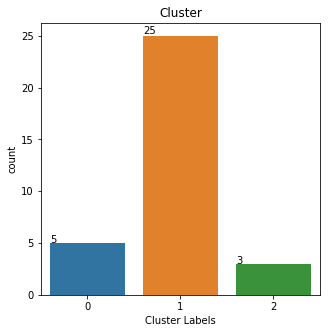

In [205]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Cluster Labels',data=dt_merged)
ax.set_title("Cluster")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

C:\Users\yipa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


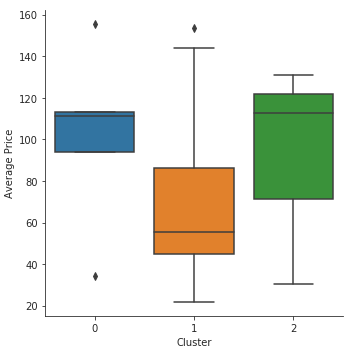

In [214]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Cluster Labels", "price_avgprice", data=dt_merged, kind="box")
    g.set_axis_labels("Cluster", "Average Price");

C:\Users\yipa\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


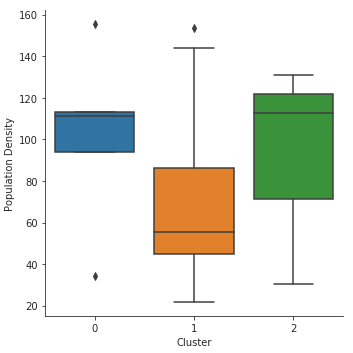

In [215]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Cluster Labels", "Population density", data=dt_merged, kind="box")
    g.set_axis_labels("Cluster", "Population Density");

### Observations:

Through Clustering, we can observed neightbourhoods following into cluster 0 and 2 stands out. Both of them have higher rental price than the cluster 1. 
Cluster 2 is among the most expensive area. With the highest rental price, the most amount of restaurant. In cluster 2, Westminster is by far having the most restaurants and clbus so as number of rental properties. It is also with on par the highest rental price and more reviews than the rest of cluster 2, meaning more popular among renters. This suggests that if you are looking to invest in an expensive property targeting higher class renter. Westminster is considered a good location. 
Cluster 0 is the middle cluster n terms of price. Neightbourhoods in this cluster also considered as new development and fast growing borough. I would recommend Camden as the locaation for investment. It is remained as one of the most popular location for tourist. It is suggested that it is also having the highest rental price among cluster 0 yet less competition than Westminster.